In [241]:
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns
%matplotlib inline
import numpy as np # for computations
import pandas as pd # for manipulating data
import scipy.stats as sci

from sklearn.linear_model import LinearRegression

In [242]:
F_ES = pd.read_csv('C:/Anaconda2/Quantiacs/tickerData/F_ES.txt', parse_dates=['DATE'])
# F_ES = pd.read_csv('.../tickerData/F_ES.txt')
# Let's do some analysis on two contracts YM and ES
F_YM = pd.read_csv('C:/Anaconda2/Quantiacs/tickerData/F_YM.txt', parse_dates=['DATE'])

In [243]:
F_ES = F_ES.drop(columns=['DATE', ' P', ' R', ' RINFO']).iloc[-1000:]
print len(F_ES)

1000


In [244]:
# Use prior days' close prices to( predict the next day's price
X_train = F_ES.iloc[:-200]
y_train = F_ES[' CLOSE'].iloc[1:-199]

model = LinearRegression().fit(X_train, y_train)
m = model.coef_[0]
b = model.intercept_
# equation of the line
# print 'y = ', round(m[0],2), 'x + ', round(b[0],2)

In [245]:
X_test = F_ES[-199:-2]
preds = model.predict(X_test)
print len(preds)

197


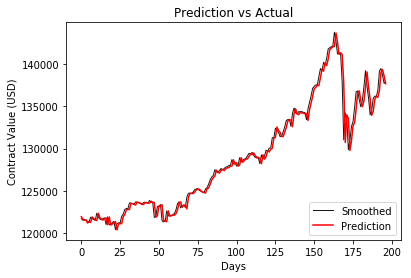

In [246]:
y_test = np.array(F_ES[' CLOSE'].iloc[-198:-1])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y_test, color=(0,0,0), linewidth=1, alpha=.9, label='Smoothed')
ax.plot(preds, color = (1,0,0), label = 'Prediction')
ax.legend(loc='lower right')
ax.set_title('Prediction vs Actual')
ax.set_xlabel('Days')
ax.set_ylabel('Contract Value (USD)')
plt.show()

In [247]:
from sklearn.metrics import mean_squared_error

In [248]:
mean_squared_error(y_test, preds)/200

4455.576230582809

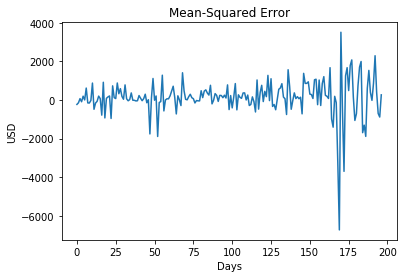

In [249]:
plt.figure()
plt.title('Mean-Squared Error')
plt.xlabel('Days')
plt.ylabel('USD')
plt.plot(y_test-preds)
plt.show()